# Exam Results Analysis and Prediction
This notebook contains an analysis of data concerning students and their exam performance. The goal of the project is to understand the factors influencing exam results and to build a predictive model.

## 1. Data Loading and Initial Exploration

In [30]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data – change filename to yours
df = pd.read_csv('/content/drive/MyDrive/Students Analysis/Exam_Score_Prediction.csv')  # <-- enter the exact filename after upload

# First look
print("First 5 rows:")
print(df.head())

print("\nData Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        moderate        5

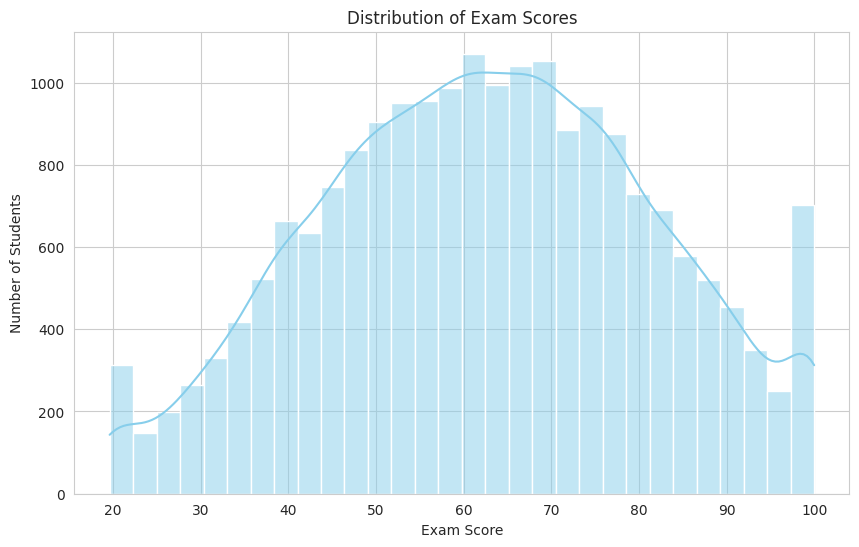

In [31]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Distribution of exam_score (target)
plt.figure(figsize=(10,6))
sns.histplot(df['exam_score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.show()

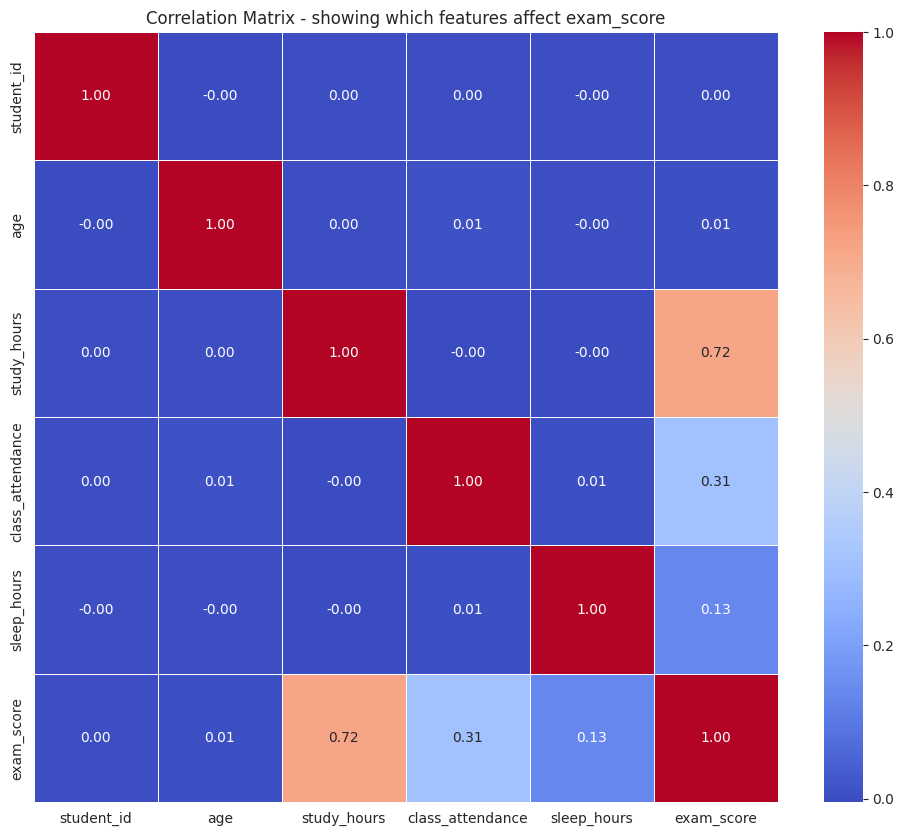

In [32]:
# 2. Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - showing which features affect exam_score')
plt.show()

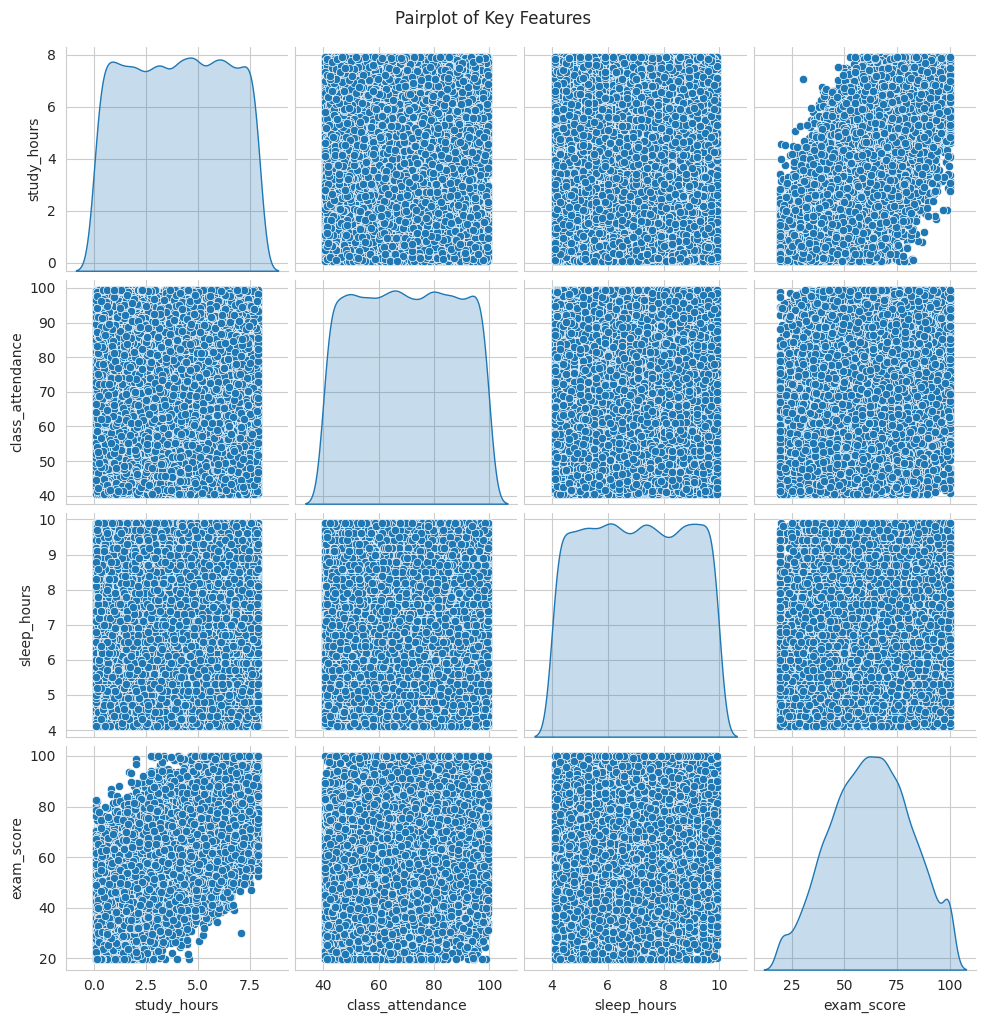

In [33]:
# 3. Pairplot for key features
important_cols = ['study_hours', 'class_attendance', 'sleep_hours', 'exam_score']  # adjust if you have 'previous_scores'
sns.pairplot(df[important_cols], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 2. Data Preparation (Preprocessing)

In this section, we prepare the data for building predictive models. This includes removing unnecessary columns, identifying categorical and numerical columns, as well as splitting the data into training and test sets. We also apply scaling to numerical features and one-hot encoding to categorical columns.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Remove useless columns (student_id, age – zero correlation)
df_clean = df.drop(['student_id', 'age'], axis=1)

# Categorical columns (object) – e.g., gender, course, study_method, etc.
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('exam_score')  # target

# Target
y = df_clean['exam_score']
X = df_clean.drop('exam_score', axis=1)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of data after preprocessing:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

Shape of data after preprocessing:
X_train: (16000, 10), X_test: (4000, 10)


## 3. Model Building and Evaluation

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Full pipeline – preprocessing + model
# 1. Linear Regression as baseline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 2. Random Forest – our main model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train on training data
print("Training Linear Regression...")
lr_pipeline.fit(X_train, y_train)

print("Training Random Forest...")
rf_pipeline.fit(X_train, y_train)

# Predictions on test data
lr_pred = lr_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

# Metrics
print("\n=== MODEL RESULTS ===")
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, lr_pred):.3f}")
print(f"R²: {r2_score(y_test, lr_pred):.3f}")

print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, rf_pred):.3f}")
print(f"R²: {r2_score(y_test, rf_pred):.3f}")

Training Linear Regression...
Training Random Forest...

=== MODEL RESULTS ===
Linear Regression:
RMSE: 9.773
MAE: 7.863
R²: 0.733

Random Forest:
RMSE: 10.656
MAE: 8.589
R²: 0.683


=== Simple Linear Regression (study_hours only) ===
R²: 0.5245
RMSE: 13.042
MAE: 10.641
Coefficient (slope): 5.867 points per study hour
Intercept: 39.020


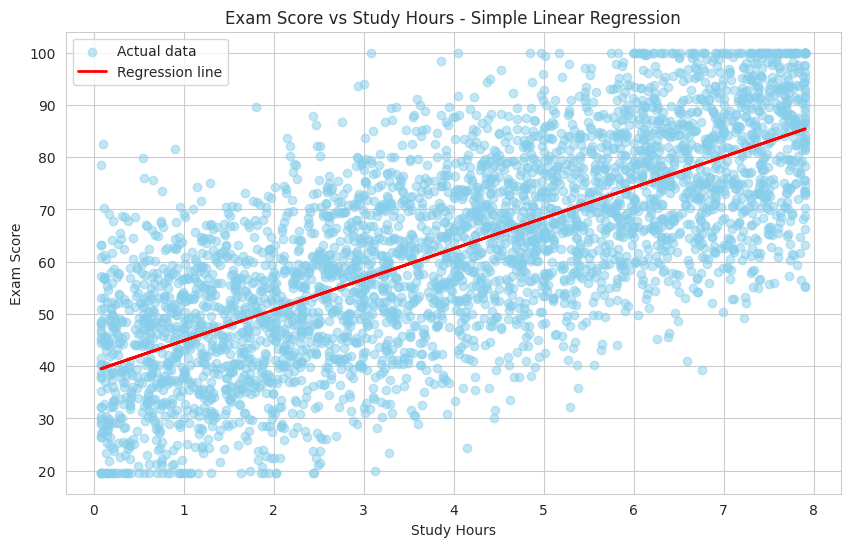

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Only one feature: study_hours
X_simple = df[['study_hours']]  # must be a DataFrame, not Series
y = df['exam_score']

# Split (80/20)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Model
simple_lr = LinearRegression()
simple_lr.fit(X_train_s, y_train_s)

# Predictions
y_pred_s = simple_lr.predict(X_test_s)

# Metrics
print("=== Simple Linear Regression (study_hours only) ===")
print(f"R²: {r2_score(y_test_s, y_pred_s):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_s)):.3f}")
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_s):.3f}")
print(f"Coefficient (slope): {simple_lr.coef_[0]:.3f} points per study hour")
print(f"Intercept: {simple_lr.intercept_:.3f}")

# Visualization
plt.figure(figsize=(10,6))
plt.scatter(X_test_s, y_test_s, alpha=0.5, color='skyblue', label='Actual data')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression line')
plt.title('Exam Score vs Study Hours - Simple Linear Regression')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

## 4. Summary and Next Steps

In this section, we present a summary of the results from our analysis and propose potential directions for further research or model improvements.

### Summary of Results

We conducted an initial analysis of data related to students' exam performance and built predictive models. Key observations:

*   **Data Exploration**: Variables such as `study_hours` (hours studied) and `class_attendance` (class attendance) appear to be strongly correlated with `exam_score` (exam score).
*   **Predictive Models**:
    *   **Simple Linear Regression** (using only `study_hours`) achieved an $R^2$ of 0.525, RMSE: 13.042, MAE: 10.641. It shows that each additional hour of study translates to approximately 5.87 more points on the exam.
    *   **Multivariate Linear Regression** (using multiple features) achieved an $R^2$ of 0.733, RMSE: 9.773, MAE: 7.863.
    *   **Random Forest Regressor** (using multiple features) achieved an $R^2$ of 0.683, RMSE: 10.656, MAE: 8.589.

It can be seen that the linear regression model with the full set of features (after preprocessing) achieved better results than Random Forest, which is an interesting finding and suggests that for this data, the relationship is linear or close to linear.

### Next Steps & Possible Improvements

Although the dataset is synthetic (very clean, no outliers, mostly linear relationships), here are realistic ideas for improvement in a real-world scenario:

1. **Feature Engineering**  
   Create new features, e.g., interactions (study_hours × sleep_hours) or polynomial terms to capture non-linear effects.

2. **Advanced Models**  
   Try Gradient Boosting algorithms like XGBoost or LightGBM – they often outperform Random Forest on tabular data.

3. **Hyperparameter Tuning**  
   Use GridSearchCV or RandomizedSearchCV to optimize parameters (e.g., n_estimators, max_depth).

4. **Cross-Validation**  
   Apply k-fold cross-validation for more reliable performance estimates.

5. **Real-World Data Handling**  
   In actual projects, focus on dealing with missing values, outliers, and class imbalance – issues absent in this synthetic dataset.

This project demonstrates a complete ML pipeline: EDA → Preprocessing → Modeling → Evaluation. Thanks for swimming through it with me! 🐟